In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)
sc_x = StandardScaler()
X_scl_train = sc_x.fit_transform(X_train)

C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_scl_train, y_train)

res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

y_train_pred = cross_val_predict(clf, X_scl_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Average Accuracy: 	 0.9583
Accuracy SD: 		 0.0417
Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


In [8]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))]) 
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 
svm_grid_rbf.fit(X_scl_train, y_train) 
svm_grid_rbf.best_score_
best = svm_grid_rbf.best_estimator_.get_params() 

for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))
    
X_scl_test = sc_x.fit_transform(X_test)
y_test_pred = svm_grid_rbf.predict(X_scl_test)

confusion_matrix(y_test, y_test_pred)

print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s


	clf__C: 	 0.10
	clf__gamma: 	 0.50
Precision Score: 	 0.8923
Recall Score: 		 0.7667
F1 Score: 		 0.7667


[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    3.6s finished


In [9]:
import pickle
pickle.dump(clf, open('clf.pkl', 'wb'))


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)
sc_x = StandardScaler()
X_scl_train = sc_x.fit_transform(X_train)

#-------------------------------------------------------------------------
import pickle
clf = pickle.load( open( "clf.pkl", "rb" ) )
clf.fit(X_scl_train, y_train)
#-------------------------------------------------------------------------

res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

y_train_pred = cross_val_predict(clf, X_scl_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))





Average Accuracy: 	 0.9583
Accuracy SD: 		 0.0417
Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


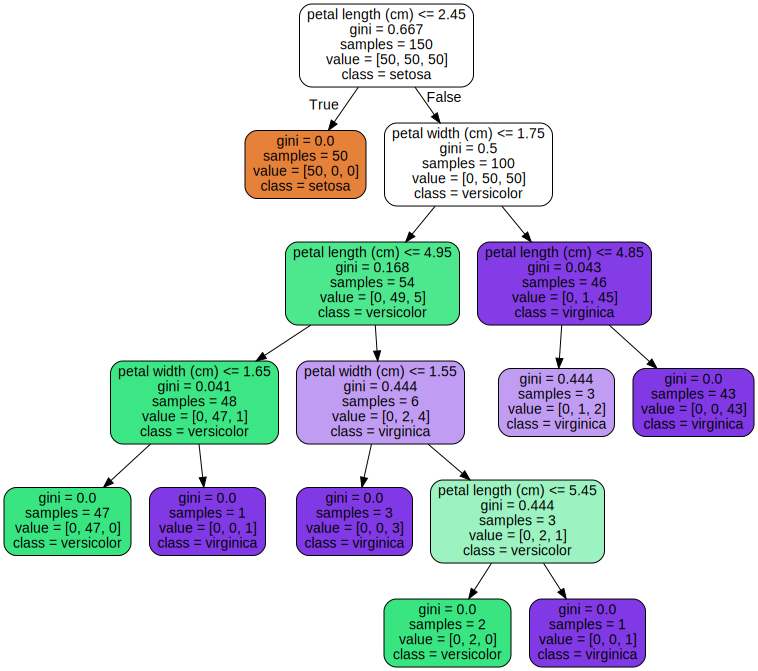

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import svm
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
import graphviz

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

graph = graphviz.Source(dot_data)
graph